经过标准化处理后的数据： [[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]
Sklearn自带葡萄酒数据集的标签值： [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


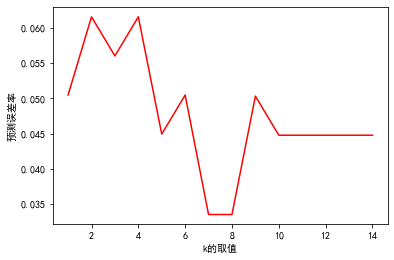

In [5]:
#项目4-项目实训代码

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.model_selection import cross_val_score  #导入交叉验证模块
import matplotlib.pyplot as plt

#数据标准化处理
data=load_wine().data
cdata=preprocessing.StandardScaler().fit_transform(data)  

#输出数据集的特征变量与标签值，并将数据集拆分为训练集与测试集
x,y=cdata,load_wine().target
print("经过标准化处理后的数据：",x)
print("Sklearn自带葡萄酒数据集的标签值：",y)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=30) 

#k取不同值的情况下，模型的预测误差率计算
k_range=range(1,15)         #设置k值的取值范围
k_error=[]                  #保存预测误差率的数组
for k in k_range:
    model=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(model,x,y,cv=5,scoring='accuracy')#5折交叉验证
    k_error.append(1-scores.mean())              

#画图，x轴表示k的取值，y轴表示预测误差率
plt.rcParams['font.sans-serif']='Simhei'
plt.plot(k_range,k_error,'r-')
plt.xlabel('k的取值')
plt.ylabel('预测误差率')
plt.show()


In [6]:
from sklearn.metrics import accuracy_score
#k=7时，训练模型
model=KNeighborsClassifier(n_neighbors=7)
model.fit(x_train,y_train)
#对模型进行评估
pred=model.predict(x_test)
ac=accuracy_score(y_test,pred)
print("模型预测准确率：",ac)
print("测试集的预测标签：",pred)
print("测试集的真实标签：",y_test)

模型预测准确率： 1.0
测试集的预测标签： [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2]
测试集的真实标签： [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2]


In [7]:
#对新样本所属类别进行预测
import numpy as np

x_new=np.array([[13.2,2.77,2.51,18.5,96.6,1.04,2.55,0.57,1.47,6.2,1.05,3.33,820]])
pred=model.predict(x_new)
print("新样本的预测标签：",pred)

新样本的预测标签： [0]
